<a href="https://colab.research.google.com/github/sreekanth0555/fmml/blob/main/Statistics_and_Probability_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Statistics and Probability: Fundamentals**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

**What is Probability?**


Definitions 

In nature as in Computer Science, one of several events can be predicted to occur, but we do not know exactly which of them will occur. The supposition is that they will occur with different frequencies, and we know those frequency. So each time we run the experiment, we call is a sample.

The thing that we are computing the probability of is typically a boolean condition.

Whether or not the sample belongs to a set: Does a integer sampled randomly belong to the set of natural numbers?
Any set of boolean conditions on that set: Is an integer samples randomly prime, and it's either greater than 100 or less than 50.
By membership in a continuous set: Is the speed of the car in the range 60 to 80.8 km per hour.
Given this boolean formulation, we can construct a set of elements which we are computing the probability of. We will call these favorable samples.


               P = favorable/possible samples

 
For now assume that all samples in our set of all possibilities (i.e. sample space) are equally likely. This need not be true, the samples can themselves be chosen from some probability distribution, a proposition which we will encounter when we study conditional probability.

In [12]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))


In [10]:
results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(), 
                        y=results.value_counts().values)])
fig.show()

Tails    53
Heads    47
dtype: int64


**Derived Probability Distributions**
Given the simple fact that each toss will be heads or tails (also called a bernoulli distribution) we can come up with a derived question, that given 20 coin tosses, what is the probability that 7 of them are heads.

You can see the probability distribution below, it's called a Binomial distribution and looks like a Bell. This will always happen whenever you have a bunch of independently sampled variables. (Independent and Identical, see Central Limit Theorem)



In [13]:
results = pd.Series([np.sum(toss_coin(20) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(), 
                        y=results.value_counts().values)])
fig.show()

In [14]:
results = pd.Series([np.sum(toss_coin(500) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(), 
                        y=results.value_counts().values)])
fig.show()

**How much to Sample**


It's hard to estimate the probability of real world events experimentally. Like what is the probability of rolling a dice and getting a 2. Well, it's 1/6, easy to see theoretically. Often it won't be, in which case we need to see from experiments what the answer is.

We have the 1/6 theoretical result as a Red line. The probability of getting each number from 1 to 6 is shown, but the different colors represent the different number of experiments it was sampled from. Blue was estimated using 10 experiments, Red using 100, Green with a 1000, Purple with 10000, and Orange with 100000. You can see that as we get more samples, the correctness and the reliability of that correctness increases.

You can also see, that if we took 100 samples, and we have a value far away from 1/6, taking more samples will take us back to 1/6 in time. This phenomenon is called Regression to the Mean.

In [15]:
results = {shots: throw_dice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(), 
                        y=result.value_counts().values / shots,) 
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

In [16]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']
    
    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

14 cards were thrown: 10S 8H 9H JH 3D 4C 7S 2H KD 5D 9C 6D 6C 4H AD
1 cards were thrown: 6H AS
3 cards were thrown: 9H 6H 5D AH
4 cards were thrown: 3H 7C 5H 10H AD
3 cards were thrown: KH 9S 6S AD
12 cards were thrown: 9C 7H 3H 5H 5C JS 5S 5D QC QD KH 8C AC
4 cards were thrown: QD 7H 2S 7C AH
1 cards were thrown: 3D AD
0 cards were thrown: AD
10 cards were thrown: 10C KS 5H 9C 8H 10D 4S 10S 6S 4H AS

9.6961 cards are tossed before we see the first ace!


**Visualize the Underlying Probability Mass Function**
If you guess mathematically, you will guess that almost 1/13 cards are aces, so about 12 can be met on average before you see your first ace. And you won't be totally wrong.

Of course the percentage of aces increases as you keep throwing away the cards, so the actual expectation is not that.

Let's see the probability distribution for it!

In [17]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(), 
                        y=results.value_counts().values)])
fig.show()

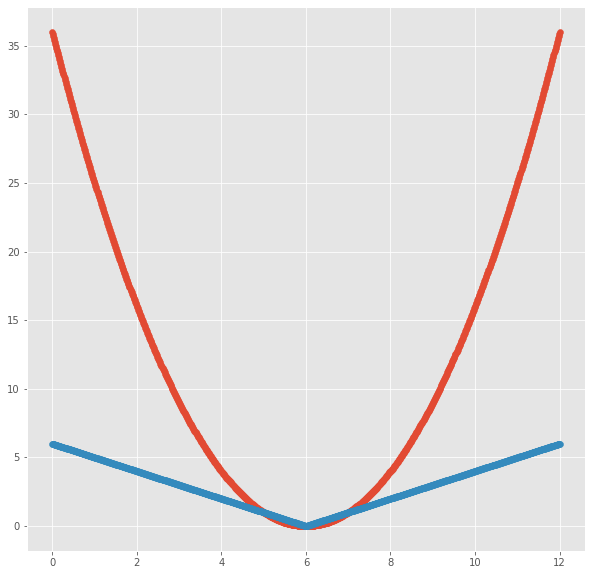

In [18]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

**Standardisation**

In [19]:
grades = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv")
print(grades.shape)
grades.agg(["mean", "var", "std"])

(26, 4)


,Physics,Biology,Maths
mean,63.769231,67.038462,69.769231
var,517.224615,456.758462,300.664615
std,22.742573,21.371908,17.339683


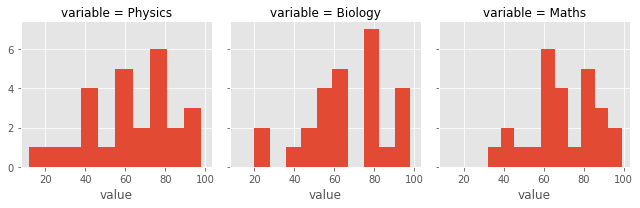

In [21]:
g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")


In [23]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std
0,Arnold,80,78,70,0.713673
1,Bob,60,98,45,-0.165735
2,Cassandra,34,56,65,-1.308965
3,Donovan,56,65,32,-0.341616
4,Emily,98,23,55,1.505141


In [24]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


**Probability Distributions**
A random variable is a variable whose possible values are the outcomes of a non-deterministic process.

Binomial distribution
We start with the binomial distribution. The binomial distribution models the probability of k successes in n  independent trials.

Let's redo the lecture example with scipy. Import the binom class from scipy.stats:



In [25]:
from scipy.stats import binom

If the chance of winning a game is 0.75, what is the probability of losing all 5 games?

Assume the chance of winning each game is independent. Then we can solve this problem using the binomial distribution.

We use the .pmf method of the binom class. pmf stands for probability mass function: a function that states the probability that a discrete random variable is equal to any one value.



In [26]:
binom.pmf(k=5, n=5, p=0.25)

0.0009765625

In [27]:
1 - binom.pmf(k=4, n=5, p=0.75) - binom.pmf(k=5, n=5, p=0.75)

0.36718749999999994

In [28]:
binom.cdf(3, n=5, p=0.75)

0.3671875

**Normal distribution**
We move on to the normal distribution. There are some key properties that are important to know about this distribution:

The mean, median and mode of the distribution is the same.
The curve is bell-shaped.
The total area under the curve is 1.
Symmetric about the mean.
There are two key shape parameters that define the location and spread of the normal distribution: the mean, commonly denoted as (m mue) and the standard deviation, commonly denoted as (sigma).

Again, start by importing the norm class from scipy.stats:

In [29]:
from scipy.stats import norm

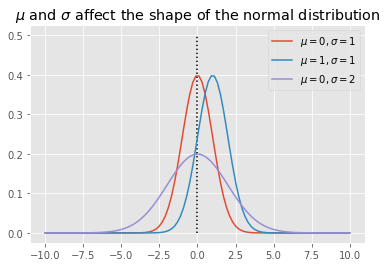

In [30]:
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

In [31]:
norm.cdf(0)

0.5

In [32]:
norm.ppf(0.5)

0.0

Standard deviation rule/empirical rule
A useful rule of thumb is the standard deviation rule, or empirical rule.

This rule states that for a normally distributed random variable,

!68% of data lies within 1 standard deviation of the mean.
!95% of data lies within 2 standard deviations of the mean, and
!99.7% of data lies within 3 standard deviations of the mean.


Maalysian males' heights are normally distributed with mean 169.57 and standard deviation 7.57. Answer the following questions programmatically and using the empirical rule.

84% of Malaysians have height of less than ... cm.


In [35]:
norm.ppf(0.84, loc=169.57, scale=7.57)




177.09804617589782

In [36]:
169.57 + 7.57

177.14

The tallest 2.5% of Malaysians are taller than ... cm


In [37]:
norm.ppf(0.975, loc=169.57, scale=7.57)


184.4069273629682

In [38]:
169.57 + 2 * 7.57

184.70999999999998

The shortest 0.15% of Malaysians are shorter than ... cm

In [39]:
norm.ppf(0.0015, loc=169.57, scale=7.57)

147.10422390516268